# Data Exploration - Pos Processed Dataset

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

processed_data = pd.read_csv('../data/processed.csv')

### Missing values

In [15]:
pd.options.mode.use_inf_as_na = True

def print_missing_values(data):
    print('Missing values: \n')
    for i in data:
        count = 0
        for j in data[i]:
            if j == 'None' or j == None or j == '' or j == ' ':
                count += 1
        if (count != 0):
            print(f'{i}: {count} ; {round(count / len(data) * 100, 2)}%')

##### Processed dataset

In [16]:
print_missing_values(processed_data)

Missing values: 

ReleaseDate: 87 ; 0.66%
PromotionalDescription: 658 ; 4.98%
Website: 3232 ; 24.47%
PCMinReqsText: 728 ; 5.51%
PCRecReqsText: 7444 ; 56.36%
LinuxMinReqsText: 10157 ; 76.9%
LinuxRecReqsText: 12008 ; 90.91%
MacMinReqsText: 8611 ; 65.2%
MacRecReqsText: 11481 ; 86.92%
wikiData: 10946 ; 82.87%


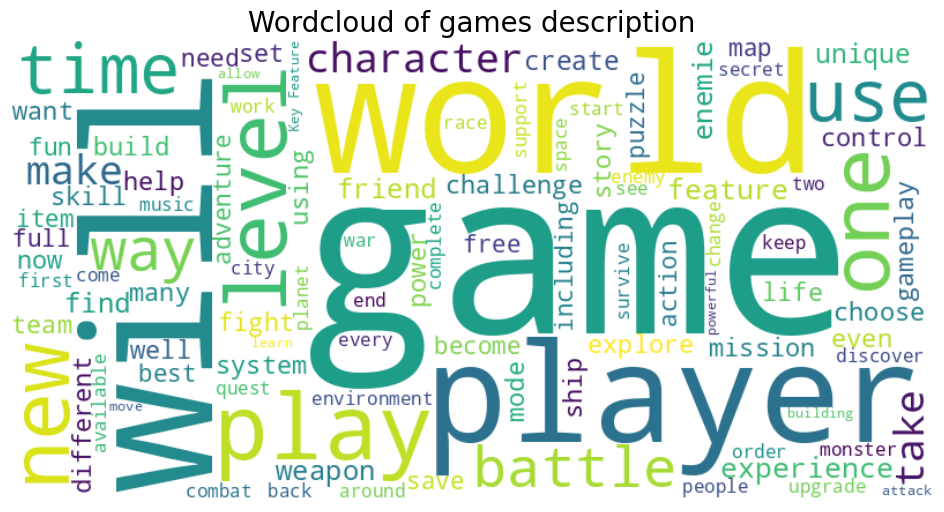

In [21]:
from wordcloud import WordCloud

# Start with one review:
text = ' '.join(x for x in processed_data['PromotionalDescription'])

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=400,max_font_size=200, max_words=100, background_color="white").generate(text)
plt.figure( figsize=(12,6) )
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.title('Wordcloud of games description', fontsize=20)    
plt.show()

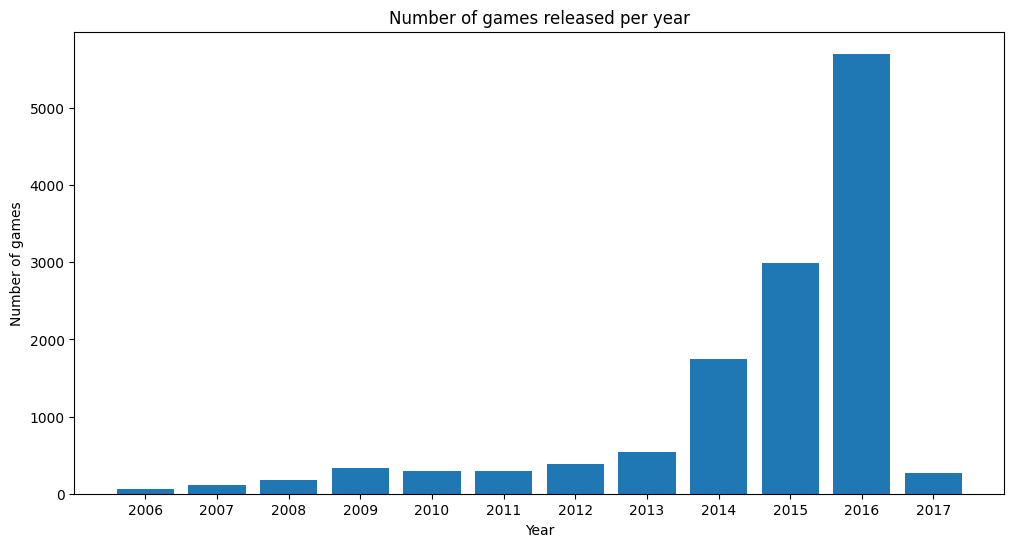

In [24]:
x = sorted(list(set(x[-4:] if x[-4:].isnumeric() else '0' for x in processed_data['ReleaseDate'])))[1:]
processed_data['year'] = processed_data['ReleaseDate'].apply(lambda x: int(x[-4:] if x[-4:].isnumeric() else 0))
y = processed_data.groupby('year').size().reset_index()

y = list(y[0])[1:]

plt.figure( figsize=(12,6) )

plt.xlabel('Year')
plt.ylabel('Number of games')
plt.title('Number of games released per year')
plt.bar(x[8:-2], y[8:-2])

print("", end='')

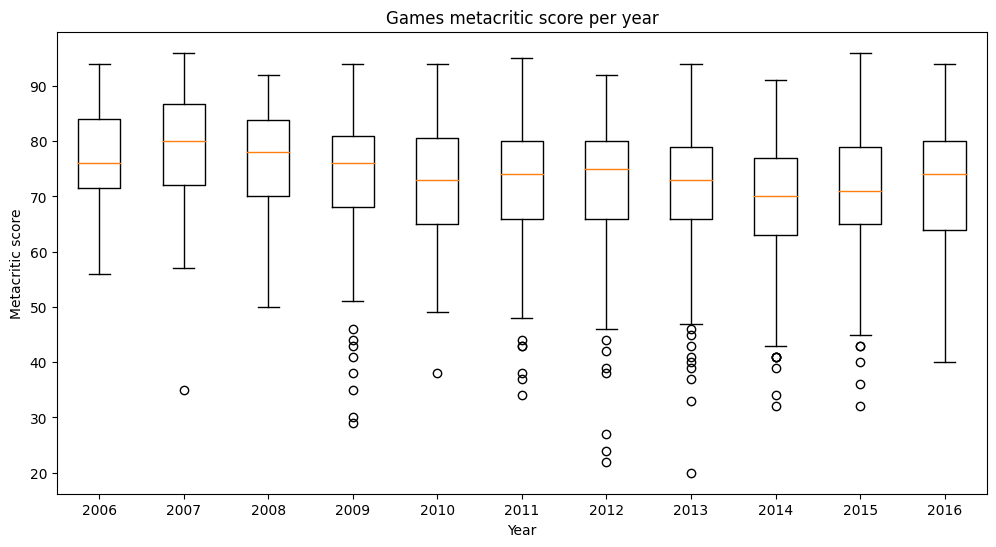

In [28]:
x = list(x[-4:] if x[-4:].isnumeric() else '-1' for x in processed_data['ReleaseDate'])
y = [y for y in processed_data['Metacritic']]

names = sorted(list(set(x[-4:] if x[-4:].isnumeric() else '0' for x in processed_data['ReleaseDate'])))[1:]

dic = {}

for i in range(0, len(x)):
    if (y[i] != 0):
        if (x[i] in dic):
            dic[x[i]].append(y[i])
        else:
            dic[x[i]] = [y[i]]

data = []

for i in sorted(dic.keys()):
    if (int(i) > 2005 and int(i) < 2017):
        data.append(dic[i])

plt.figure( figsize=(12,6) )

plt.title('Games metacritic score per year')
plt.xlabel('Year')
plt.ylabel('Metacritic score')

plt.boxplot(data, labels=names[8:-3])

print("", end='')